# Car speed prediction

### Goal is to predict average speed of car based on factors like roadSurface, traffic, drivingStyle...

In [ ]:
"""
[Datasource]
https://www.kaggle.com/gloseto/traffic-driving-style-road-surface-condition
"""

In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Data loading

In [180]:
"""
    decimal=',' will replace comma with decimal point in number series.
"""
data = pd.read_csv('road_condition.csv', sep=';', decimal=',')

In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7392 entries, 0 to 7391
Data columns (total 17 columns):
AltitudeVariation            7338 non-null float64
VehicleSpeedInstantaneous    7385 non-null float64
VehicleSpeedAverage          7038 non-null float64
VehicleSpeedVariance         7038 non-null float64
VehicleSpeedVariation        7358 non-null float64
LongitudinalAcceleration     7392 non-null float64
EngineLoad                   7392 non-null float64
EngineCoolantTemperature     7392 non-null int64
ManifoldAbsolutePressure     7392 non-null int64
EngineRPM                    7392 non-null int64
MassAirFlow                  7392 non-null float64
IntakeAirTemperature         7392 non-null int64
VerticalAcceleration         7392 non-null float64
FuelConsumptionAverage       7295 non-null float64
roadSurface                  7392 non-null object
traffic                      7392 non-null object
drivingStyle                 7392 non-null object
dtypes: float64(10), int64(4), object

### Features

In [ ]:
"""
useful feature are 'VehicleSpeedInstantaneous' , 'roadSurface', 'traffic', 'drivingStyle'.
"""

In [186]:
dummy_traffic = pd.get_dummies(data['traffic'], prefix='traffic')

In [187]:
dummy_roadSurface = pd.get_dummies(data['roadSurface'], prefix='surf')

In [188]:
dummy_drivingStyle = pd.get_dummies(data['drivingStyle'], prefix='driving')

### Prepare dataframe for model training

In [192]:
df = pd.DataFrame()

In [193]:
keep_cols = ['VehicleSpeedInstantaneous', 'VehicleSpeedAverage']

In [194]:
df = data[keep_cols].join(dummy_traffic).dropna()
df = df.join(dummy_drivingStyle).dropna()
df = df.join(dummy_roadSurface).dropna()

In [196]:
df.rename(columns={'VehicleSpeedInstantaneous':'norm_speed',
                   'traffic_HighCongestionCondition':'traffic_high',
                   'traffic_LowCongestionCondition':'traffic_low', 
                   'traffic_NormalCongestionCondition':'traffic_normal',
                   'driving_AggressiveStyle':'driv_aggr',
                   'driving_EvenPaceStyle':'driv_even',
                   'surf_SmoothCondition':'surf_smooth',
                   'surf_UnevenCondition':'surf_uneven',
                   'VehicleSpeedAverage': 'avg_speed'
                  }, inplace=True)

In [197]:
df.head()

,norm_speed,avg_speed,traffic_high,traffic_low,traffic_normal,driv_aggr,driv_even,surf_smooth,surf_uneven
59,25.670519,13.223501,0,1,0,0,1,1,0
60,24.094259,13.638919,0,1,0,0,1,1,0
61,22.743179,14.031043,0,1,0,0,1,1,0
62,22.292820,14.171073,0,1,0,0,1,1,0
63,23.643900,14.328954,0,1,0,0,1,1,0


### Model

In [199]:
X = df[['norm_speed', 'traffic_high', 'traffic_low', 'driv_aggr', 'driv_even', 
           'surf_smooth', 'surf_uneven']]
y = df['avg_speed']

In [200]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [202]:
model = LinearRegression()

In [203]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [204]:
prediction = model.predict(X_test)

'\n    Linearity is observed in scatter plot which shows our model did well.\n'

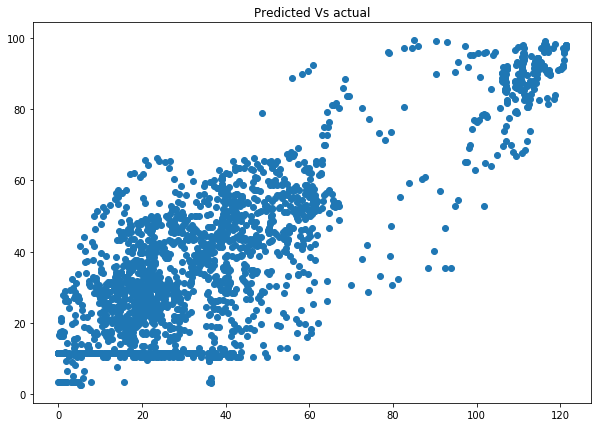

In [212]:
plt.figure(figsize=(10,7))
plt.scatter(y_test, prediction) 
plt.title('Predicted Vs actual')
"""
    Linearity is observed in scatter plot which shows our model did well.
"""

### RMSE

In [ ]:
from sklearn import metrics

In [ ]:
mean_sq_error = metrics.mean_squared_error(y_test, prediction)

In [ ]:
rmse = np.sqrt(mean_sq_error)
rmse

In [213]:
print('R-squared:', model.score(X_test, y_test))

R-squared: 0.6970763148423738
